# Diabetes?

In this notebook, we will explore the different methodologies to extract, preprocess and analyse the data.

## Problem Statement: Predict the likelihood of a patient having diabetes or not based on the givrn features. 

We determine the outcome with different algorithms abd compare the performance of the model through various parameter scores.


1. Import the necessary libraries

In [37]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from collections import Counter
from collections import defaultdict

#Advanced Visualization Libraries
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True) #enables plotly plots to be displayed in notebook
cmap1 = "gist_gray"

#Models
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#Metrics, Preprocessing and Tuning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Customization
import warnings
warnings.filterwarnings("ignore")
from termcolor import colored

In [6]:
%reload_ext autoreload
%autoreload 2

# Set precision for pd and np (np: suppress also sci notation)
np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = "{:,.4g}".format

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.1.3

1.2.2


## Load the data

In [12]:
def load_data():
    entire_df = pd.read_csv("diabetes.csv")
    x_train = entire_df.drop("Outcome", axis=1)
    x_with_target = entire_df['Outcome']
    y_train = x_with_target.values.reshape(-1, 1)
    return x_train, y_train, x_with_target

In [14]:
#print the shapes of the data

x_train, y_train, x_with_target = load_data()
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_with_target shape: ", x_with_target.shape)


x_train shape:  (768, 8)
y_train shape:  (768, 1)
x_with_target shape:  (768,)


In [18]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.34,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
# We split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Explore the data

We Split our dataset into train and test sets. We will train our model from the data in the train set. After that we will test it on the x-test data which is our test data set.

In [25]:
def stats(data):
    #check the shaape of the data
    print("The shape of the data is: ", data.shape)
    #number of rows
    print("The number of rows is: ", data.shape[0])
    #number of columns
    print("The number of columns is: ", data.shape[1])
    #check the columns
    print("The columns are: ", data.columns)
    #check the data types
    print("The data types are: ", data.dtypes)
    #check the null values
    print("The null values are: ", data.isnull().sum())
    #check the number of unique values
    print("The number of unique values are: ", data.nunique())
    #check the number of categorical columns in the df
    print("The number of categorical columns are: ", len(data.select_dtypes(include = "object").columns))
    #check the number of numerical columns in the df
    print("The number of numerical columns are: ", len(data.select_dtypes(include = ["int64", "float64"]).columns))
    #check the descriptive statistics
    print('The Descriptive statistics are: ', data.describe().T)
    return data.head()

In [26]:
stats(x_train)

The shape of the data is:  (614, 8)
The number of rows is:  614
The number of columns is:  8
The columns are:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
The data types are:  Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object
The null values are:  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
The number of unique values are:  Pregnancies                  17
Glucose                     133
BloodPressure                44
SkinThickne

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [27]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,614,3.743,3.313,0,1,3,6,17
Glucose,614,120.9,32.04,0,100,117,139,199
BloodPressure,614,69.42,18.51,0,64,72,80,122
SkinThickness,614,20.4,15.43,0,0,23,32,63
Insulin,614,81.44,116.2,0,0,42.5,129.8,846
BMI,614,31.98,7.741,0,27.1,32,36.38,67.1
DiabetesPedigreeFunction,614,0.4692,0.3368,0.078,0.2415,0.3725,0.6138,2.42
Age,614,32.91,11.5,21,24,29,40,81


In [28]:
#Checking how many 0 values are there in the dataset
zer_col = {}
for col in x_train.columns:
    zer_col[col] = x_train[x_train[col] == 0][col].count()
print(zer_col)


{'Pregnancies': 91, 'Glucose': 5, 'BloodPressure': 24, 'SkinThickness': 176, 'Insulin': 290, 'BMI': 7, 'DiabetesPedigreeFunction': 0, 'Age': 0}


In Pregnancies we expect the zeroes as it indicates that the person was pregnant 0 times, could be a male or a female who is not pregnant. We will ignore Pregnancies, and focus on other columns.

Lets plot the feature distribution of the outcome in the dataset.

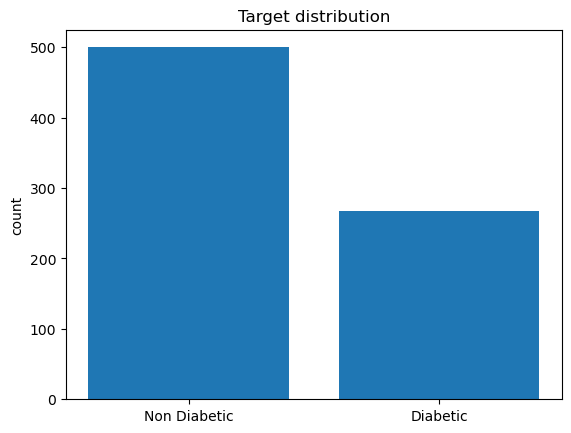

In [31]:
#plotting the distribution of the target variable

plt.bar(x=['Non Diabetic', 'Diabetic'], height=x_with_target.value_counts().to_numpy())
plt.ylabel('count')
plt.title('Target distribution')
plt.show()


Now we try to make some plots and visualize the target distribution, outliers, etc.

## Target Distribution across features

In [67]:
plot_with_target = x_train.copy()
plot_with_target['Outcome'] = y_train

In [70]:
#outcome distribution across all the features barplot
def num_features(df, num_var, tar_var):
    x0 = plot_with_target[plot_with_target[tar_var]==0][num_var]
    x1 = df[df[tar_var]==1][num_var] 
    
    trace1 = go.Histogram(x = x0,
                               name = "Non Diabetic",
                               opacity = 0.75,
                               marker=dict(color="#0A4D68",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))
                                           
    trace2 = go.Histogram(x = x1,
                               name = "Diabetic",
                               opacity = 0.75,
                               marker=dict(color="#A6D0DD",
                                           line = dict(color = '#DBE6EC',
                                                       width = 1)))
                                           
    data = [trace1, trace2]
                                           
    layout = go.Layout(title={'text': num_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor':'center',
                         'yanchor':'top'},
                         barmode='overlay',
                         yaxis=dict(title='Count'),
                         template = 'plotly_dark')
                                           
    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig)


In [71]:
for i in num_var:
    num_features(plot_with_target, i, 'Outcome')
    

We plot the correlation matrix to understand the feature correlation.

In [56]:
x_train.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1,0.1425,0.1575,-0.07069,-0.0664,0.0272,-0.01894,0.553
Glucose,0.1425,1,0.1583,0.01732,0.3371,0.2052,0.1416,0.2707
BloodPressure,0.1575,0.1583,1,0.1781,0.08583,0.25,0.04483,0.2396
SkinThickness,-0.07069,0.01732,0.1781,1,0.4376,0.3862,0.1746,-0.1499
Insulin,-0.0664,0.3371,0.08583,0.4376,1,0.196,0.1589,-0.04382
BMI,0.0272,0.2052,0.25,0.3862,0.196,1,0.1319,0.004453
DiabetesPedigreeFunction,-0.01894,0.1416,0.04483,0.1746,0.1589,0.1319,1,0.02005
Age,0.553,0.2707,0.2396,-0.1499,-0.04382,0.004453,0.02005,1


In [78]:
# Correlation Heatmap
go.Figure(data=go.Heatmap(
        z=x_train.corr().values,
        x=x_train.columns,
        y=x_train.columns,
        colorscale='Viridis',
        reversescale=True,
        text=np.round(x_train.corr().values, decimals=2),
        opacity=0.8,
        xgap=1,
        ygap=1,
        hoverongaps=False)).show()

We see that the features: Glucose, Age, BMI and Pregnancy are important according to the correlation matrix / heatmap.


After we see the distribution of the outcome, we now plot some visualization to check outliers.

In [76]:
#To check the outliers, we will plot the boxplot of the dataset
go.Figure(data=go.Box(
    y=x_train['Insulin'],
    name='Insulin',
    marker_color='#0A4D68',
    boxmean=True,
    line_color='#0A4D68',
    opacity=0.8)).show()

go.Figure(data=go.Box(
    y=x_train['Glucose'],
    name='Glucose',
    marker_color='#0A4D68',
    boxmean=True,
    line_color='#0A4D68',
    opacity=0.8)).show()

go.Figure(data=go.Box(
    y=x_train['BloodPressure'],
    name='BloodPressure',
    marker_color='#0A4D68',
    boxmean=True,
    line_color='#0A4D68',
    opacity=0.8)).show()

go.Figure(data=go.Box(
    y=x_train['SkinThickness'],
    name='SkinThickness',
    marker_color='#0A4D68',
    boxmean=True,
    line_color='#0A4D68',
    opacity=0.8)).show()


## Preprocess the data

We will now proceed with handling the null values.
With our previous analysis we already know that there are no Nan (missing) values in the dataset. But we do see some values in features like Glucose populated to 0. Lets check that

In [88]:
#convert y_train to a dataframe
x_train_target = pd.DataFrame(y_train, columns=['Outcome'])

In [90]:
import tqdm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import lightgbm as lgb
import gc

def get_feature_importances(train_df, shuffle, seed=None):    
    X_tr = train_df.copy()
    
    if shuffle:
        # Here you could as well use a binomial distribution
        y_tr = x_train_target.copy().sample(frac=1.0)
    else:
        y_tr = x_train_target.copy()

    all_imp_df = []

    # ADD TRAIN ERROR
    for nestimators in tqdm.tqdm(range(100)):
        rus = RandomUnderSampler(
            # sampling_strategy=1/NEGATIVE_OVER_POSITIVE_SAMPLES_RATIO
            )
        
        X_rus,y_rus = rus.fit_resample(X_tr,y_tr)

        dtrain = lgb.Dataset(X_rus, y_rus, free_raw_data=False)
        lgb_params = {
            'objective': 'binary',
            'n_jobs': -1,
            'verbosity': -1,
        }
        clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200)
        del X_rus, y_rus
        gc.collect()   

        # clfs.append(clf)

        imp_df = pd.DataFrame()
        imp_df["feature"] = x_train.columns.tolist()
        imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
        imp_df["importance_split"] = clf.feature_importance(importance_type='split')
        all_imp_df.append(imp_df)
    all_imp_df = pd.concat(all_imp_df, axis=0)

    return all_imp_df
#here what we did was we created a function that will return the feature importance of the dataset by using the lightgbm model
#In detail, we first created a copy of the dataset and then we shuffled the target variable and then we created a list of all the feature importance
#we did this because we want to see how the model performs when the target variable is shuffled and when it is not shuffled
#we also used the RandomUnderSampler to undersample the dataset so that the model can perform better

#This technique basically 

In [91]:
actual_imp_df = get_feature_importances(x_train, shuffle=False)
null_imp_df = get_feature_importances(x_train, shuffle=True)

100%|██████████| 100/100 [00:25<00:00,  3.90it/s]


In [92]:
def calculate_correlation_scores(actual_imp_df, null_imp_df): 
    correlation_scores = []
    for _f in actual_imp_df['feature'].unique():
        f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
        f_act_imps = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].values
        gain_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
        f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
        f_act_imps = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].values
        split_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
        correlation_scores.append((_f, split_score, gain_score))

    corr_scores_df = pd.DataFrame(correlation_scores, columns=['feature', 'split_score', 'gain_score'])
    return correlation_scores, corr_scores_df

#here in this function we are calculating the correlation scores of the features
#the summary of the function is that we are calculating the correlation scores of the features by using the feature importance of the model
#this works by first calculating the feature importance of the model and then shuffling the target variable and then calculating the feature importance of the model
#we do this because we want to see how the model performs when the target variable is shuffled and when it is not shuffled

In [93]:
correlation_scores, corr_scores_df= calculate_correlation_scores(actual_imp_df, null_imp_df)

In [97]:
import matplotlib.gridspec as gridspec

def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)

    # Plot importances
    ax = plt.subplot(gs[0, 0])
    ax.hist(actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].values, alpha=0.5, color='r',label='Actual importances score')
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, alpha=0.5,  label='Null importances')
    ax.legend()
    ax.set_title('Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())
    
    # Plot importances
    ax = plt.subplot(gs[0, 1])
    ax.hist(actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].values, alpha=0.5,  color='r',label='Actual importances')
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, alpha=0.5,  label='Null importances')
    plt.axvline(actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].quantile(0.25), color = 'g', label = '25th quantile of the actual importance')
    ax.legend()
    null_importance_score = corr_scores_df[corr_scores_df.feature == feature_]['gain_score'].values[0]
    ax.set_title(f'Null independence score {null_importance_score}', fontweight='bold')
    
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())

    #here we are plotting the distribution of the feature importance of the model and the distribution of the feature importance of the model when the target variable is shuffled
    #we do this to see how the model performs when the target variable is shuffled and when it is not shuffled

After the Null feature score, important feature score: 

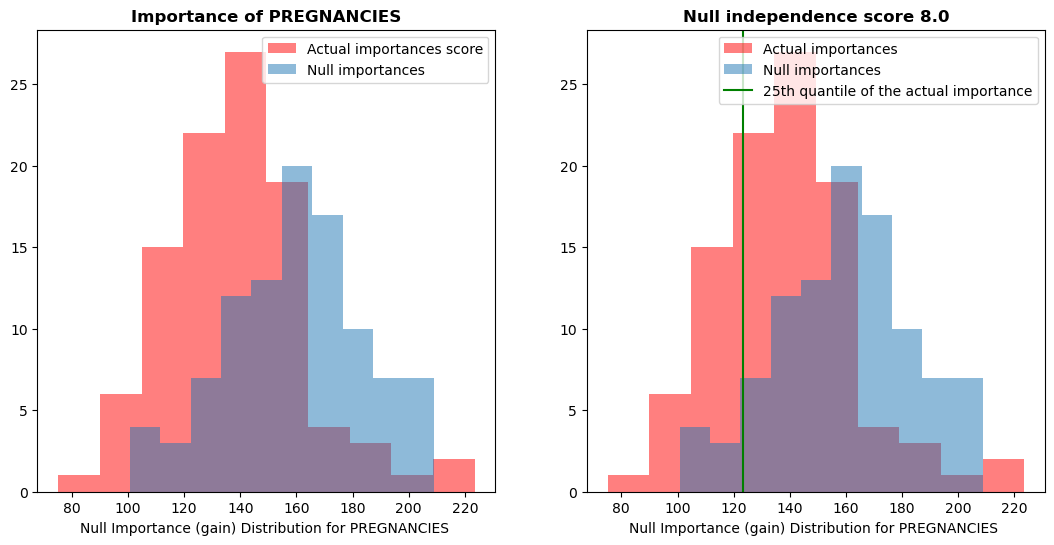

In [98]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='Pregnancies')

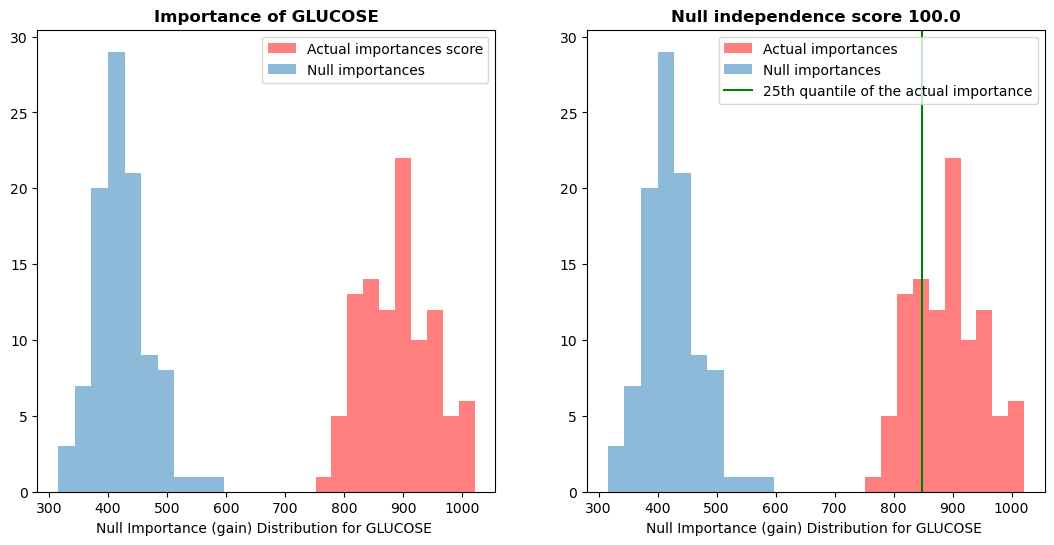

In [99]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='Glucose')

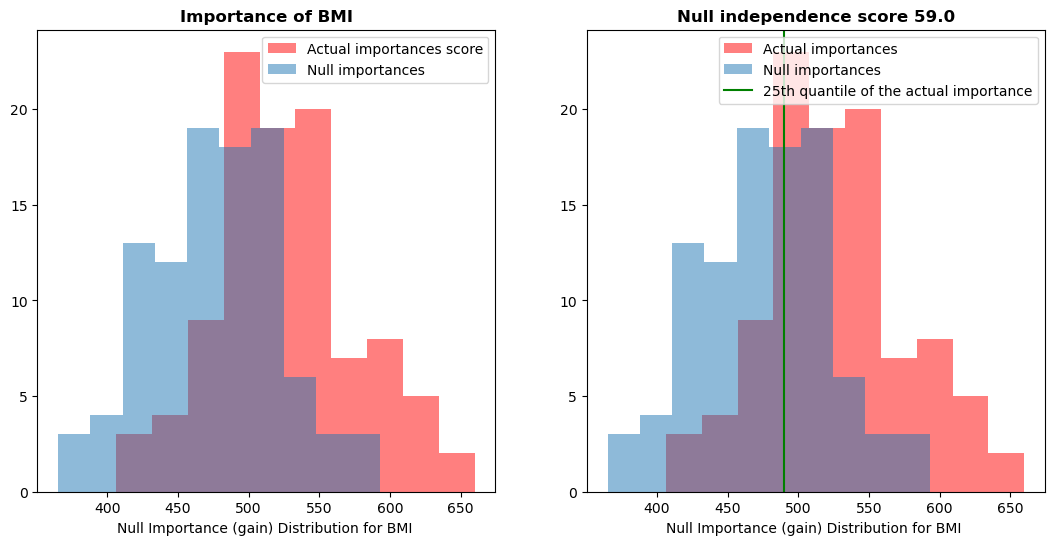

In [100]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='BMI')

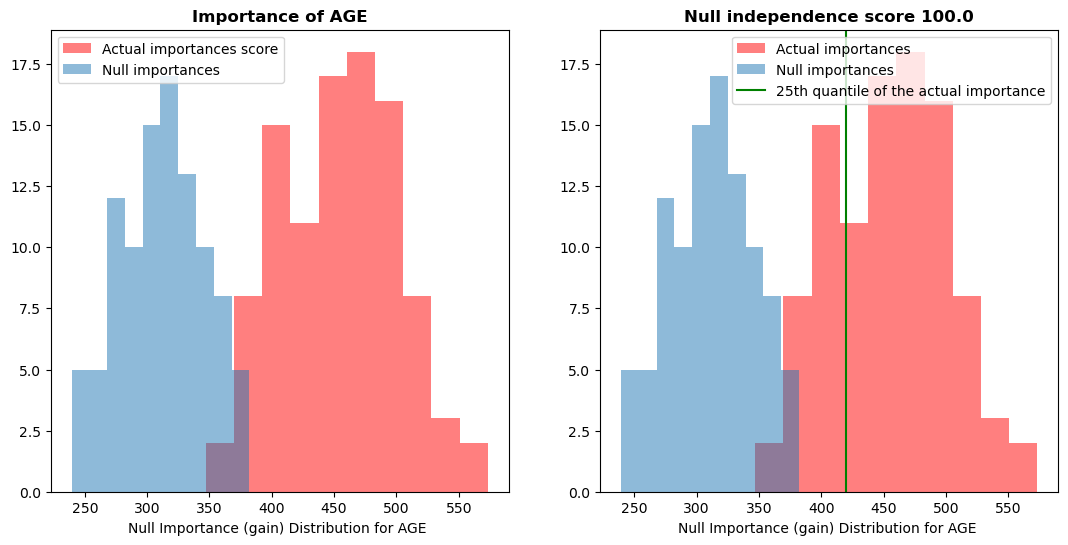

In [103]:
display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_='Age')

After splitting the dataset (df_bal) into the train and test split, we apply different algorithms to check the performnace of the dataset on the algorithms

In [105]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

def score_feature_selection(x_train, y_train, selected_fts, selected_cat_fts):
    folds = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
    X_train = x_train[selected_fts]
    y_train = y_train
    splits = list(folds.split(X_train, y_train))

    y_oof = np.zeros(X_train.shape[0])

    for fold_n in range(5):
        train_index, valid_index = splits[fold_n]
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[valid_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[valid_index] 

        for nestimators in range(10):
            rus = RandomUnderSampler()
            
            X_rus,y_rus = rus.fit_resample(X_tr,y_tr)
            
            dtrain = lgb.Dataset(X_rus, y_rus, free_raw_data=False)
            lgb_params = {
                    'objective': 'binary',
                    'boosting_type': 'goss',
                    'subsample': 1.0,
                    'colsample_bytree': 0.7,
                    'num_leaves': 8,
                    'max_depth': 3,
                    'n_jobs': -1,
                    'verbosity': -1,
                }
            clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200)



            y_oof[valid_index] += clf.predict(X_val)  / 10
            del X_rus, y_rus
            gc.collect()   

    y_oof = (y_oof > 0.5).astype(int)

    score = metrics.balanced_accuracy_score(y_train, y_oof)  # scoring
    num_features = X_train.shape[1]
    
    return score, num_features

## 1. Logistic Regression

In [122]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [123]:
#baseline model
y_pred = log.predict(x_test)

Our data is skewed, meaning that the number of 0's are more than the number of 1's
also not normally distributed data means that the mean and median are not equal
in an ideal case, the mean and median should be equal. So we use the F1 score as the metric to calculate the accuracy

Accuracy score 0.7402597402597403
Confusion matrix [[78 21]
 [19 36]]
Classification report               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



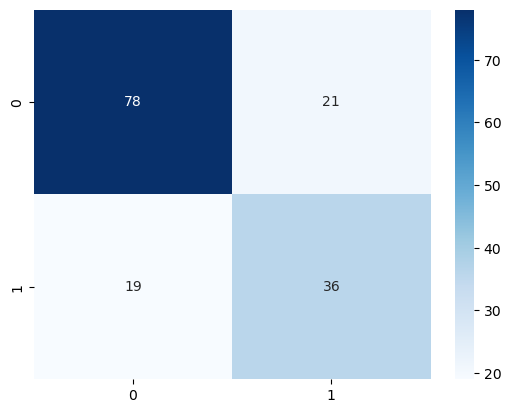

In [124]:
#Printing the accuracy score, confusion matrix and classification report

print('Accuracy score', accuracy_score(y_test, y_pred))
print('Confusion matrix', confusion_matrix(y_test, y_pred))
print('Classification report', classification_report(y_test, y_pred))

#plotting the confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()


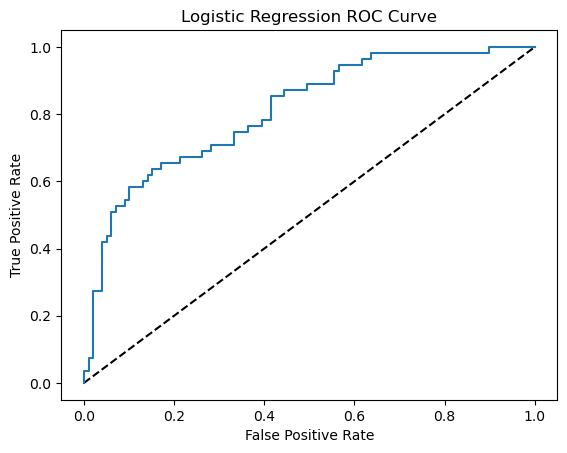

In [125]:
#plotting the ROC curve

y_pred_prob = log.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


In [126]:
#Printing the AUC score
#this score tells us how well the model is able to distinguish between the classes
print('AUC score', roc_auc_score(y_test, y_pred_prob))


AUC score 0.8104683195592286


In [127]:
#Hyperparameter tuning

#We will use GridSearchCV to find the best parameters for the model

#We will use the following parameters:
#penalty: l1 or l2
#C: Inverse of regularization strength. Smaller values specify stronger regularization
#solver: Algorithm to use in the optimization problem. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
#max_iter: Maximum number of iterations taken for the solvers to converge

#Creating the parameter grid

param_grid = {'penalty': ['l1', 'l2'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear', 'saga'],
                'max_iter': [100, 1000, 2500, 5000]}

#Creating the model

log = LogisticRegression()

#Instantiating GridSearchCV

log_cv = GridSearchCV(log, param_grid, cv = 5)

#Fitting the model

log_cv.fit(x_train, y_train)

#Printing the best parameters

print('Best parameters', log_cv.best_params_)
print('Best score', log_cv.best_score_)
print('Best estimator', log_cv.best_estimator_)
print('Best index', log_cv.best_index_)





Best parameters {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score 0.7655204584832733
Best estimator LogisticRegression(C=1, penalty='l1', solver='liblinear')
Best index 48


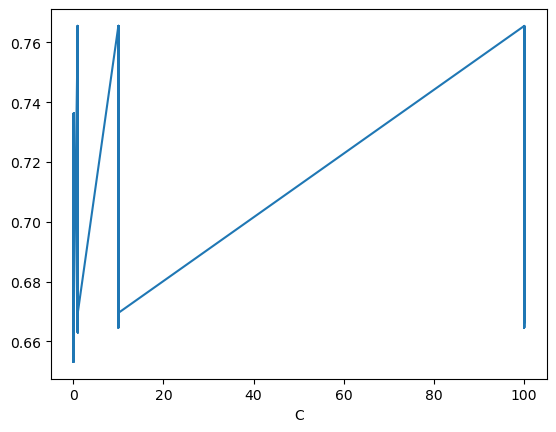

In [128]:
# plot the mean cross-validation scores

log_results = pd.DataFrame(log_cv.cv_results_['params'])
log_results['test_score'] = log_cv.cv_results_['mean_test_score']
log_results.plot(x = 'C', y = 'test_score', legend = False)
plt.show()


Lets try other models and see their performance evaluation through different models.

We will now make the Baseline models individually to in the end implement stacking and increasing the accuracy.

Here are the other Level 0 classifiers.

## Level 0 Classifiers

### Naive Bayes

In [129]:
#Naive Bayes

#Creating the model
nb = GaussianNB()
#Fitting the model
nb.fit(x_train, y_train)
#baseline model
y_pred = nb.predict(x_test)


Accuracy score 0.7662337662337663
confusion_matrix [[79 20]
 [16 39]]
classification_report               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



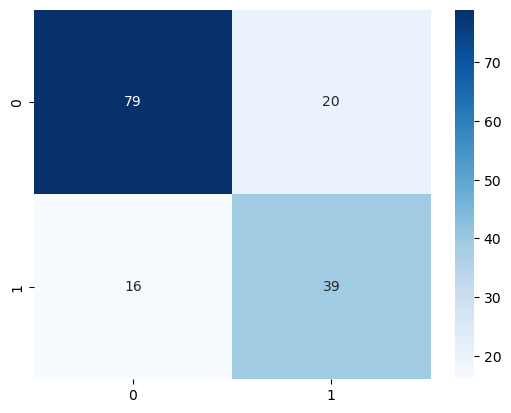

In [130]:
#Printing the accuracy score, confusion matrix and classification report

print('Accuracy score', accuracy_score(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))
print('classification_report', classification_report(y_test, y_pred))

#plotting the confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

### Random Forest Classifier

In [131]:
# Implementing Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

accuracy_score 0.7207792207792207
confusion_matrix [[77 22]
 [21 34]]
classification_report               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



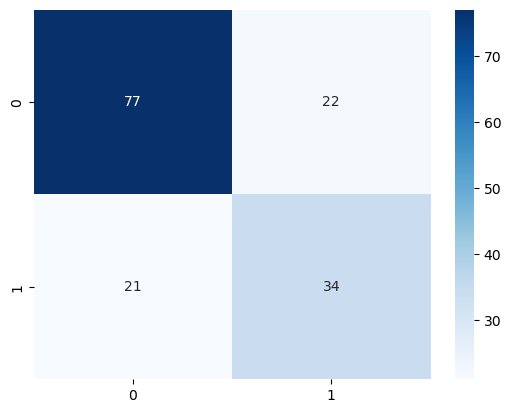

In [132]:
#Printing the accuracy score, confusion matrix and classification report

print('accuracy_score', accuracy_score(y_test, rfc_pred))
print('confusion_matrix', confusion_matrix(y_test, rfc_pred))
print('classification_report', classification_report(y_test, rfc_pred))

#plotting the confusion matrix
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

### KNN

In [133]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)


accuracy_score 0.6623376623376623
confusion_matrix [[70 29]
 [23 32]]
classification_report               precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



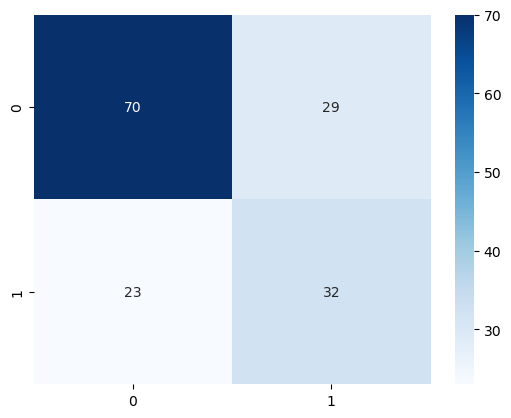

In [134]:
#Printing the accuracy score, confusion matrix and classification report
print('accuracy_score', accuracy_score(y_test, knn_pred))
print('confusion_matrix', confusion_matrix(y_test, knn_pred))
print('classification_report', classification_report(y_test, knn_pred))

#plotting the confusion matrix
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

### Decision Tree Classifier

In [135]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)

accuracy_score 0.7532467532467533
confusion_matrix [[77 22]
 [16 39]]
classification_report               precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



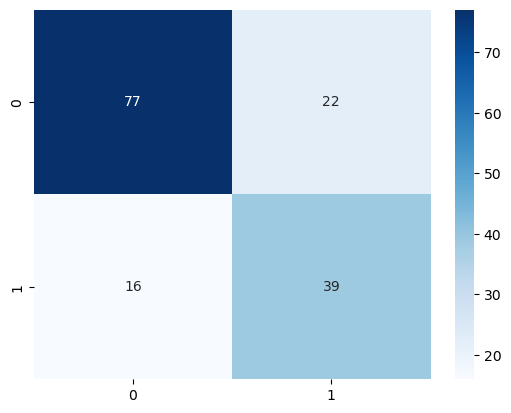

In [136]:
print('accuracy_score', accuracy_score(y_test, dtc_pred))
print('confusion_matrix', confusion_matrix(y_test, dtc_pred))
print('classification_report', classification_report(y_test, dtc_pred))

#plotting the confusion matrix
cm = confusion_matrix(y_test, dtc_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

### Now I am going to make a function that implements all the models.

Learning rate set to 0.008365
0:	learn: 0.6888458	total: 182ms	remaining: 3m 1s
1:	learn: 0.6852947	total: 189ms	remaining: 1m 34s
2:	learn: 0.6814512	total: 195ms	remaining: 1m 4s
3:	learn: 0.6771557	total: 201ms	remaining: 50s
4:	learn: 0.6737050	total: 207ms	remaining: 41.2s
5:	learn: 0.6695564	total: 212ms	remaining: 35.1s
6:	learn: 0.6653279	total: 218ms	remaining: 30.9s
7:	learn: 0.6615001	total: 224ms	remaining: 27.8s
8:	learn: 0.6573796	total: 229ms	remaining: 25.2s
9:	learn: 0.6547598	total: 233ms	remaining: 23.1s
10:	learn: 0.6506556	total: 238ms	remaining: 21.4s
11:	learn: 0.6475215	total: 242ms	remaining: 19.9s
12:	learn: 0.6444544	total: 248ms	remaining: 18.8s
13:	learn: 0.6408372	total: 252ms	remaining: 17.8s
14:	learn: 0.6379786	total: 255ms	remaining: 16.8s
15:	learn: 0.6340366	total: 259ms	remaining: 15.9s
16:	learn: 0.6302563	total: 264ms	remaining: 15.2s
17:	learn: 0.6267499	total: 267ms	remaining: 14.5s
18:	learn: 0.6241853	total: 270ms	remaining: 14s
19:	learn: 0.6

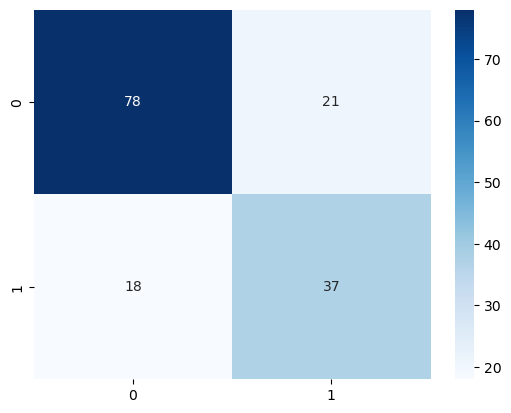

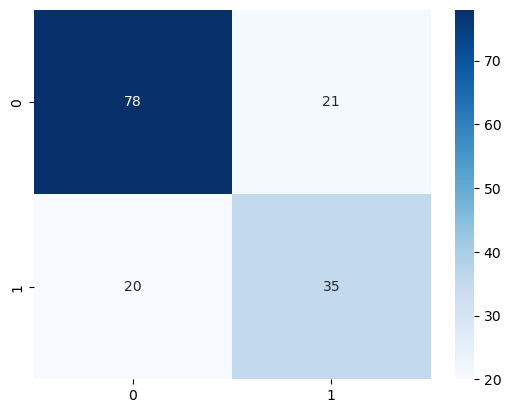

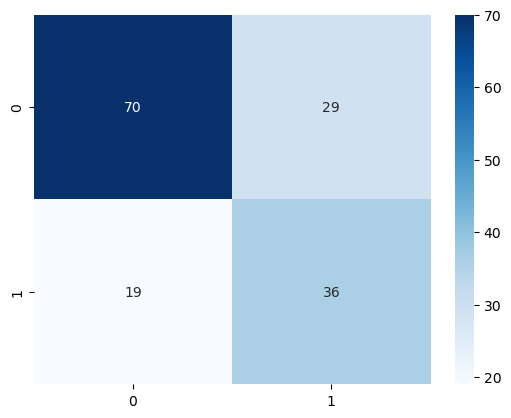

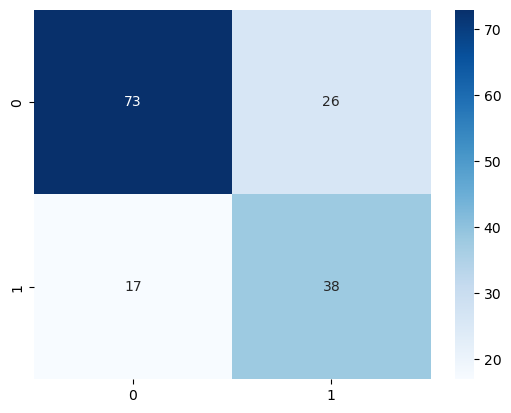

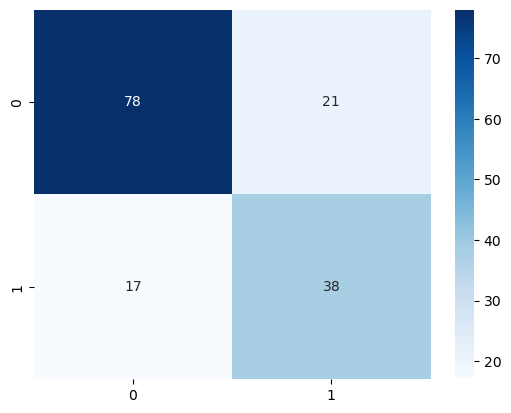

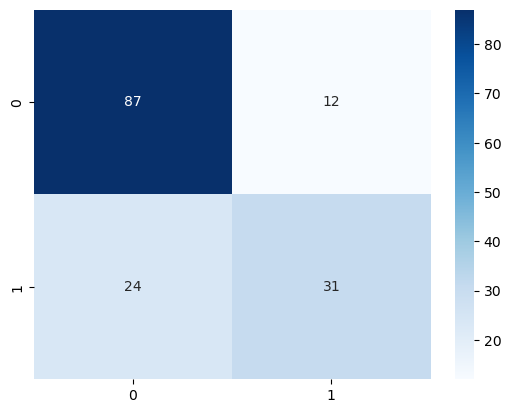

In [137]:
#Applying the gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)

#Apply the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

#Apply the XGB classifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

#Apply the LGBM classifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)

#Apply the CatBoost classifier
cat = CatBoostClassifier()
cat.fit(x_train, y_train)
cat_pred = cat.predict(x_test)

#Apply SVM
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

#Calculate the accuracy score
print('Gradient Boosting Classifier', accuracy_score(y_test, gbc_pred))
print('AdaBoost Classifier', accuracy_score(y_test, ada_pred))
print('XGB Classifier', accuracy_score(y_test, xgb_pred))
print('LGBM Classifier', accuracy_score(y_test, lgbm_pred))
print('CatBoost Classifier', accuracy_score(y_test, cat_pred))
print('SVM', accuracy_score(y_test, svm_pred))

#Calculate the confusion matrix
print('Gradient Boosting Classifier', confusion_matrix(y_test, gbc_pred))
print('AdaBoost Classifier', confusion_matrix(y_test, ada_pred))
print('XGB Classifier', confusion_matrix(y_test, xgb_pred))
print('LGBM Classifier', confusion_matrix(y_test, lgbm_pred))
print('CatBoost Classifier', confusion_matrix(y_test, cat_pred))
print('SVM', confusion_matrix(y_test, svm_pred))

#Calculate the classification report
print('Gradient Boosting Classifier', classification_report(y_test, gbc_pred))
print('AdaBoost Classifier', classification_report(y_test, ada_pred))
print('XGB Classifier', classification_report(y_test, xgb_pred))
print('LGBM Classifier', classification_report(y_test, lgbm_pred))
print('CatBoost Classifier', classification_report(y_test, cat_pred))
print('SVM', classification_report(y_test, svm_pred))

#plotting the confusion matrix
cm = confusion_matrix(y_test, gbc_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

cm = confusion_matrix(y_test, ada_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

cm = confusion_matrix(y_test, lgbm_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

cm = confusion_matrix(y_test, cat_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()

### We are now going to derive a training set from these classifiers, to train the model with this derived data and check the performance of the model. 

This technique is called Stacking.

In [139]:
# We will now derive the trained data from all the models and then use the final classifier to predict the test data
trained_df = pd.DataFrame({'Random Forest': rfc_pred, 'KNN': knn_pred, 'Decision Tree': dtc_pred, 'Gradient Boosting Classifier': gbc_pred, 'AdaBoost Classifier': ada_pred, 'XGB Classifier': xgb_pred, 'LGBM Classifier': lgbm_pred, 'CatBoost Classifier': cat_pred, 'SVM': svm_pred})


In [140]:
trained_df.head()

,Random Forest,KNN,Decision Tree,Gradient Boosting Classifier,AdaBoost Classifier,XGB Classifier,LGBM Classifier,CatBoost Classifier,SVM
0,1,0,0,1,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0


In [141]:
trained_df.shape

(154, 9)

In [142]:
trained_df.to_csv('trained_df.csv')

Meta Learner 0.7987012987012987
Meta Learner [[89 10]
 [21 34]]
Meta Learner               precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



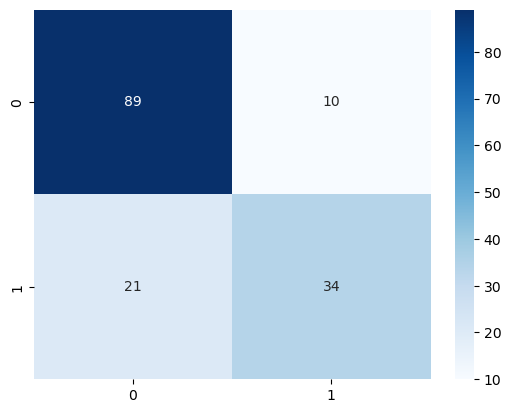

In [145]:
#build a meta learner

meta_learner = LogisticRegression()
meta_learner.fit(trained_df, y_test)
meta_learner_pred = meta_learner.predict(trained_df)

#Calculate the accuracy score
print('Meta Learner', accuracy_score(y_test, meta_learner_pred))

#Calculate the confusion matrix
print('Meta Learner', confusion_matrix(y_test, meta_learner_pred))

#Calculate the classification report
print('Meta Learner', classification_report(y_test, meta_learner_pred))

#plotting the confusion matrix
cm = confusion_matrix(y_test, meta_learner_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.show()



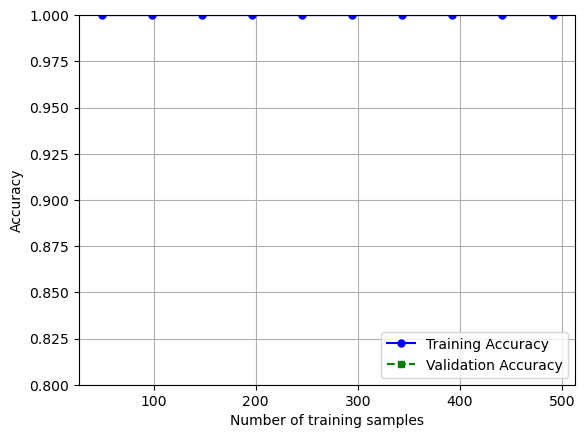

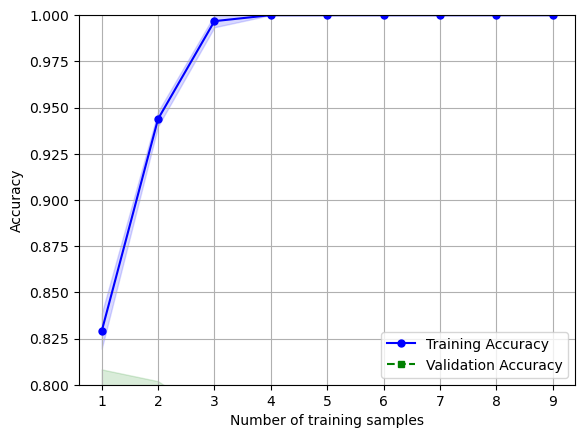

In [146]:
#plotting the learning curve for the XGB classifier to check for overfitting
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = xgb, X = x_train, y = y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv = 5, n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.0])
plt.show()

#plotting the validation curve for the XGB classifier to check for overfitting
from sklearn.model_selection import validation_curve
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_scores, test_scores = validation_curve(estimator = xgb, X = x_train, y = y_train, param_name = 'max_depth', param_range = param_range, cv = 5)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

plt.plot(param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Accuracy')

plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.0])
plt.show()

